In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
# tensorflow에서 제공하는 옷 데이터
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_input.shape
# 훈련데이터가 3차원임

(60000, 28, 28)

In [5]:
test_input.shape

(10000, 28, 28)

In [7]:
train_input, val_input, train_target, val_target=train_test_split(train_input, train_target,test_size=0.1)
# validation 검증 데이터로 분할함

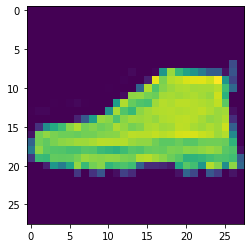

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_input[3])

In [11]:
train_target[3]

9

In [12]:
# 픽셀값 0~255 / 0에 가까울수록 검은색, 255에 가까울수록 흰색
# 즉, 255로 나누면 모든값이 0~1이 되어 값의 차이 줄일 수 있음
train_scaled=train_input.reshape(-1,784)/255 # 훈련데이터가 3차원이기에 2차원으로 바꿈.
val_scaled=val_input.reshape(-1,784)/255 # 28*28=784
test_scaled=test_input.reshape(-1,784)/255


In [13]:
train_scaled.shape

(54000, 784)

In [17]:
model=keras.Sequential()
model.add(keras.layers.Dense(256,activation='relu',input_shape=(784,)))
# 입력층에 784개의 node가 들어가고 256개로 들어감
model.add(keras.layers.Dense(128,activation='relu')) # 은닉층 개수는 알아서
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
hist=model.fit(train_scaled,train_target,epochs=30,validation_data=(val_scaled, val_target))
# 훈련데이터의 오차값은 당연히 떨어지는데 검증데이터의 오차값이 떨어지는지 봐야함
# 계속 오르면 과대적합 되었다고 보면됨

Epoch 1/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5028 - accuracy: 0.8172 - val_loss: 0.5543 - val_accuracy: 0.7985
Epoch 2/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3913 - accuracy: 0.8590 - val_loss: 0.3952 - val_accuracy: 0.8652
Epoch 3/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3670 - accuracy: 0.8709 - val_loss: 0.4455 - val_accuracy: 0.8542
Epoch 4/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3597 - accuracy: 0.8756 - val_loss: 0.4339 - val_accuracy: 0.8625
Epoch 5/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3495 - accuracy: 0.8797 - val_loss: 0.4002 - val_accuracy: 0.8703
Epoch 6/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3445 - accuracy: 0.8831 - val_loss: 0.4442 - val_accuracy: 0.8700
Epoch 7/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3369 - accuracy: 0.8871 - val_loss: 0.4486 - val_accura

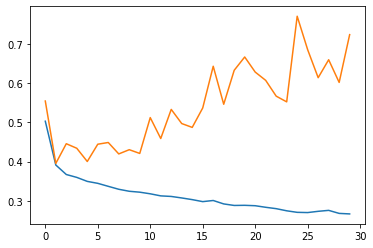

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
# 검증데이터의 오차율이 점점 올라간다는거는 과대적합이 되어 점점 훈련데이터에 가까워 진다는 뜻

In [19]:
model=keras.Sequential()
model.add(keras.layers.Dense(256,activation='relu',input_shape=(784,)))
model.add(keras.layers.Dropout(0.3)) # 은닉층의 30%는 랜덤으로 끄겟다
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

es=keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# patiendce=5 : 5번 연속 나빠지면 학습 강제 종료
# restore_best_weights=True : 마지막 5번은 삭제
cp=keras.callbacks.ModelCheckpoint('best.h5')

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy',optimizer='adam') # optimizer='adam' : 학습률 조정, 러닝메이트 기능, 수렴이 잘되게 함
hist=model.fit(train_scaled,train_target,epochs=30,validation_data=(val_scaled, val_target),
               callbacks=[es,cp])

Epoch 1/30
1688/1688 [==============================] - 10s 5ms/step - loss: 0.5386 - accuracy: 0.8043 - val_loss: 0.4292 - val_accuracy: 0.8432
Epoch 2/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4181 - accuracy: 0.8465 - val_loss: 0.3869 - val_accuracy: 0.8627
Epoch 3/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3810 - accuracy: 0.8590 - val_loss: 0.3655 - val_accuracy: 0.8677
Epoch 4/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3581 - accuracy: 0.8664 - val_loss: 0.3591 - val_accuracy: 0.8688
Epoch 5/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3448 - accuracy: 0.8721 - val_loss: 0.3521 - val_accuracy: 0.8665
Epoch 6/30
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3295 - accuracy: 0.8774 - val_loss: 0.3344 - val_accuracy: 0.8788
Epoch 7/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3219 - accuracy: 0.8800 - val_loss: 0.3410 - val_accuracy

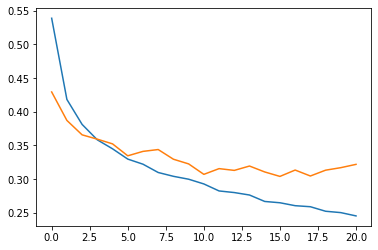

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])